In [3]:
#Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Cargar Datos
df = pd.read_csv('/content/train.csv')
len(df)

692500

In [5]:
#Veamos cuantos valores faltantes hay por columna
df.isnull().sum()

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


In [6]:
#Ahora veamos la misma informacion en terminos de porcentaje redondeado a 2
(df.isnull().sum() * 100 / len(df))

,0
ID,0.000000
PERIODO_ACADEMICO,0.000000
E_PRGM_ACADEMICO,0.000000
E_PRGM_DEPARTAMENTO,0.000000
E_VALORMATRICULAUNIVERSIDAD,0.907870
E_HORASSEMANATRABAJA,4.455884
F_ESTRATOVIVIENDA,4.640722
F_TIENEINTERNET,3.845343
F_EDUCACIONPADRE,3.347004
F_TIENELAVADORA,5.743394


In [7]:
#Creemos una funcion que nos permita calcular este porcentaje para invocarla cada que la
#necesitemos en el proceso de depuración

In [8]:
def porcentaje_faltantes(df):
    porcentaje_nan = df.isnull().sum() * 100 / len(df)
    porcentaje_nan = porcentaje_nan[porcentaje_nan > 0].sort_values() #filtro para % mayores a cero

    return porcentaje_nan

In [9]:
porcentaje_nan = porcentaje_faltantes(df)
porcentaje_nan

,0
E_VALORMATRICULAUNIVERSIDAD,0.907870
E_PAGOMATRICULAPROPIO,0.938339
F_EDUCACIONPADRE,3.347004
F_EDUCACIONMADRE,3.417184
F_TIENEINTERNET.1,3.845343
F_TIENEINTERNET,3.845343
E_HORASSEMANATRABAJA,4.455884
F_ESTRATOVIVIENDA,4.640722
F_TIENECOMPUTADOR,5.502238
F_TIENELAVADORA,5.743394


VISUALIZACIONES

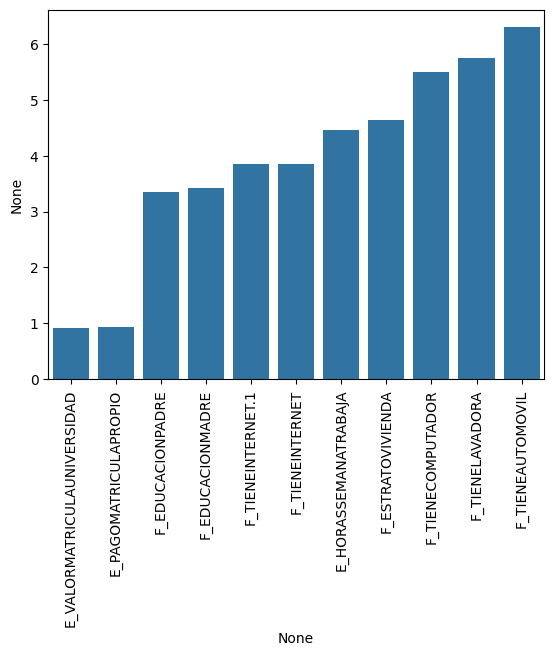

In [10]:
sns.barplot(x=porcentaje_nan.index, y=porcentaje_nan);
plt.xticks(rotation = 90);

Las columnas  y F_TIENEAUTOMOVIL, F_TIENELAVADORA y F_TIENECOMPUTADOR son las que mayor porcentaje de valores NaN poseen.



POLITICA 1: Para los datos cuyo porcentaje de faltantes sea inferior o igual 1 evaluraemos si podemos imputar valores por filas o de ser tan pequeño el porcentaje eliminar la fila


(0.0, 1.0)

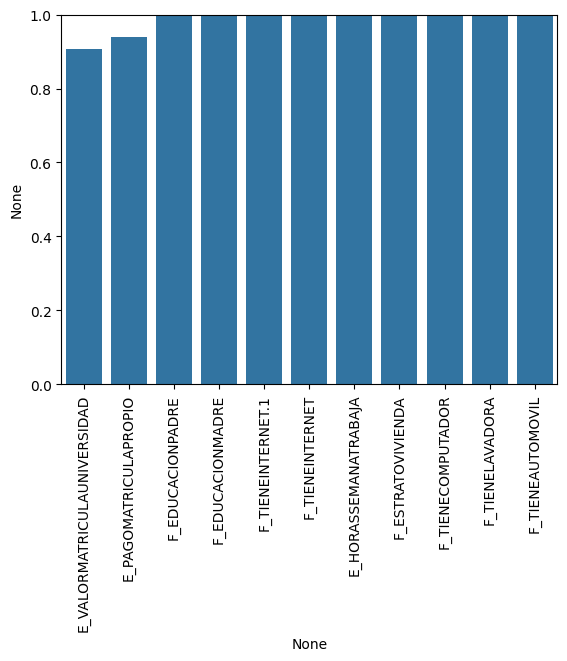

In [11]:

#Veamos que caracteristicas satisfacen la condición
sns.barplot(x=porcentaje_nan.index, y=porcentaje_nan);
plt.xticks(rotation = 90);
plt.ylim(0,1)

Entonces, para las caracteristicas E_PRGM_DEPARTAMENTO, INDICADOR_1, INICADOR_2, E_PRIVADO_LIBERTAD, RENDIMIENTO_GLOBAL, INDICADOR_3 E INDICADOR 4 el porcentaje de datos faltantes el interiro de cada columna no llega ni siquiera al 0.1% de manera que ubicaremos esas filas y las eliminaremos.

In [12]:
df = df.dropna( axis=0, subset=['E_PRGM_DEPARTAMENTO','INDICADOR_1', 'INDICADOR_2','E_PRIVADO_LIBERTAD', 'RENDIMIENTO_GLOBAL', 'INDICADOR_3', 'INDICADOR_4'])

In [13]:
#Volvamos a llamar invocar la funcion
porcentaje_nan = porcentaje_faltantes(df)
porcentaje_nan

,0
E_VALORMATRICULAUNIVERSIDAD,0.907870
E_PAGOMATRICULAPROPIO,0.938339
F_EDUCACIONPADRE,3.347004
F_EDUCACIONMADRE,3.417184
F_TIENEINTERNET.1,3.845343
F_TIENEINTERNET,3.845343
E_HORASSEMANATRABAJA,4.455884
F_ESTRATOVIVIENDA,4.640722
F_TIENECOMPUTADOR,5.502238
F_TIENELAVADORA,5.743394


Vemos que las columnas cuyo porcentaje era tan bajo ya no registran valores NaN

(0.0, 1.0)

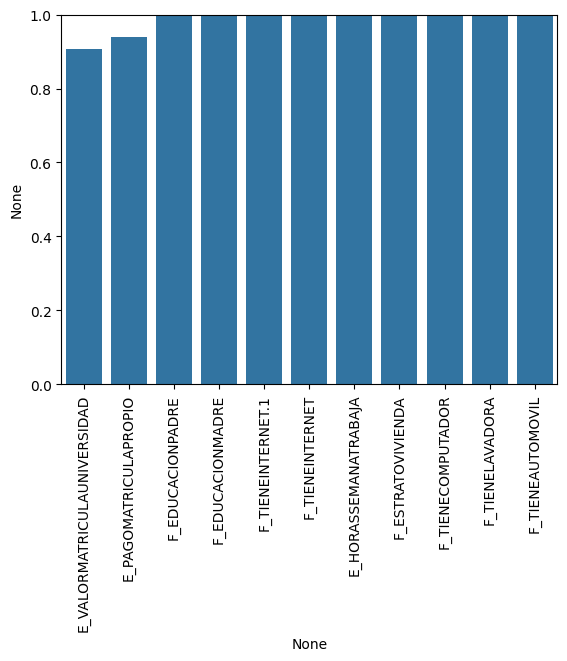

In [14]:
#Visualicemos nuevamente
sns.barplot(x=porcentaje_nan.index, y=porcentaje_nan);
plt.xticks(rotation = 90);
plt.ylim(0,1)

Para las variables restantes vamos a intentar encontrar relaciones logicas que nos permitan imputar los valores en funcion de esas relaciones que se construyan, si bien se podrian eliminar esas filas, se considera que es mejor preservar la mayor cantidad de datos posibles

In [15]:
#Vamos a evaluar que contiene cada una de estas variables restantes
mis_categoricas = ['E_VALORMATRICULAUNIVERSIDAD', 'E_PAGOMATRICULAPROPIO', 'F_EDUCACIONPADRE', 'F_EDUCACIONMADRE', 'F_TIENEINTERNET.1', 'F_TIENEINTERNET', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENECOMPUTADOR', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL' ]

# Recorre solo esas columnas
for c in mis_categoricas:
    if c in df.columns:
        print(f"{c:>10s}", np.unique(df[c].dropna()))
    else:
        print(f"La columna '{c}' no existe en el DataFrame.")

E_VALORMATRICULAUNIVERSIDAD ['Entre 1 millón y menos de 2.5 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones'
 'Entre 5.5 millones y menos de 7 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'Más de 7 millones' 'No pagó matrícula']
E_PAGOMATRICULAPROPIO ['No' 'Si']
F_EDUCACIONPADRE ['Educación profesional completa' 'Educación profesional incompleta'
 'Ninguno' 'No Aplica' 'No sabe' 'Postgrado' 'Primaria completa'
 'Primaria incompleta' 'Secundaria (Bachillerato) completa'
 'Secundaria (Bachillerato) incompleta' 'Técnica o tecnológica completa'
 'Técnica o tecnológica incompleta']
F_EDUCACIONMADRE ['Educación profesional completa' 'Educación profesional incompleta'
 'Ninguno' 'No Aplica' 'No sabe' 'Postgrado' 'Primaria completa'
 'Primaria incompleta' 'Secundaria (Bachillerato) completa'
 'Secundaria (Bachillerato) incompleta' 'Técnica o tecnológica completa'
 'Técnica o tecnológica incompleta']
F_TIENEINTERNET.1 ['No' 

**LOGICA PROPUESTA IMPUTAR VALORES FALTANTES EN LA COLUMNA E_VALORMATRICULAUNIVERSIDAD**

Si el valor está vacío (NaN) y no paga matrícula (E_PAGOMATRICULAPROPIO == "No"), entonces imputar 'No pagó matrícula'.

Si paga su matrícula ("Si") y el estrato es conocido:

Estrato 1 → 'Menos de 500 mil'

Estrato 2 → 'Entre 500 mil y menos de 1 millón'

Estrato 3 → 'Entre 1 millón y menos de 2.5 millones'

Estrato 4–5 → 'Entre 2.5 millones y menos de 4 millones'

Estrato 6 → 'Más de 7 millones'

Si el estrato es “Sin Estrato”, imputar 'Entre 500 mil y menos de 1 millón'

In [16]:
def imputar_valor_matricula(row):
    if pd.isna(row['E_VALORMATRICULAUNIVERSIDAD']):
        pago = row['E_PAGOMATRICULAPROPIO']
        estrato = row['F_ESTRATOVIVIENDA']

        if pago == 'No':
            return 'No pagó matrícula'

        elif estrato == 'Estrato 1':
            return 'Menos de 500 mil'
        elif estrato == 'Estrato 2':
            return 'Entre 500 mil y menos de 1 millón'
        elif estrato == 'Estrato 3':
            return 'Entre 1 millón y menos de 2.5 millones'
        elif estrato in ['Estrato 4', 'Estrato 5']:
            return 'Entre 2.5 millones y menos de 4 millones'
        elif estrato == 'Estrato 6':
            return 'Más de 7 millones'
        else:
            return 'Entre 500 mil y menos de 1 millón'

    # Si no hay NaN, mantener el valor original
    return row['E_VALORMATRICULAUNIVERSIDAD']

df['E_VALORMATRICULAUNIVERSIDAD'] = df.apply(imputar_valor_matricula, axis=1)


In [17]:
df['E_VALORMATRICULAUNIVERSIDAD'].isnull().sum()

np.int64(0)


**LOGICA PROPUESTA IMPUTAR VALORES FALTANTES EN LA COLUMNA E_PAGOMATRICULAPROPIO**

Ahora, si el estudiante es de estrato 1,2,3 no pago matricula con recursos propios miesntras de que si es 4,5,6 si pago matricula, y si hay un valor faltante entonces no pago

In [18]:
def imputar_pago_por_estrato(row):
    if pd.isna(row['E_PAGOMATRICULAPROPIO']):
        estrato = row['F_ESTRATOVIVIENDA']

        if estrato in ['Estrato 1', 'Estrato 2']:
            return 'No'
        elif estrato == 'Estrato 3':
            return 'No'
        elif estrato in ['Estrato 4', 'Estrato 5', 'Estrato 6']:
            return 'Si'
        else:
            return 'No'  # Para casos sin estrato o desconocidos
    else:
        return row['E_PAGOMATRICULAPROPIO']

# Aplicar la función de imputación
df.loc[:, 'E_PAGOMATRICULAPROPIO'] = df.apply(imputar_pago_por_estrato, axis=1)


In [19]:
df['E_PAGOMATRICULAPROPIO'].isnull().sum()

np.int64(0)

**LOGICA PROPUESTA IMPUTAR VALORES FALTANTES EN LAS COLUMNAS E_EDUCACIONPADRE Y E_EDUCACIONMADRE**

El nivel educativo de los padres por lo regular esta altamente relacionado con el estrato socieconomico, a mayor estrato mejor educacion

Estrato 1–2	Primaria o Secundaria incompleta

Estrato 3	Secundaria completa o Técnica incompleta

Estrato 4	Técnica o Profesional incompleta

Estrato 5–6	Profesional completa o Postgrado

Sin estrato o NaN	“No sabe” o “No Aplica”




In [20]:
import pandas as pd

def imputar_educacion(row, columna):
    valor = row[columna]
    estrato = row['F_ESTRATOVIVIENDA']
    otra_columna = 'F_EDUCACIONMADRE' if columna == 'F_EDUCACIONPADRE' else 'F_EDUCACIONPADRE'

    # Si ya tiene valor, no lo modificamos
    if pd.notna(valor):
        return valor

    # Si el otro padre/madre tiene valor, usamos ese mismo nivel
    if pd.notna(row[otra_columna]):
        return row[otra_columna]

    # Si ambos son NaN, usamos el estrato como referencia
    if estrato in ['Estrato 1', 'Estrato 2']:
        return 'Primaria completa'
    elif estrato == 'Estrato 3':
        return 'Secundaria (Bachillerato) completa'
    elif estrato == 'Estrato 4':
        return 'Técnica o tecnológica completa'
    elif estrato in ['Estrato 5', 'Estrato 6']:
        return 'Educación profesional completa'
    else:
        return 'No sabe'

# Aplicar la imputación a ambas columnas
df.loc[:, 'F_EDUCACIONPADRE'] = df.apply(lambda row: imputar_educacion(row, 'F_EDUCACIONPADRE'), axis=1)
df.loc[:, 'F_EDUCACIONMADRE'] = df.apply(lambda row: imputar_educacion(row, 'F_EDUCACIONMADRE'), axis=1)


In [21]:
df['F_EDUCACIONMADRE'].isnull().sum()

np.int64(0)

In [22]:
df['F_EDUCACIONPADRE'].isnull().sum()


np.int64(0)

**LOGICA PROPUESTA IMPUTAR VALORES FALTANTES EN LAS COLUMNAS E_HORASSEMANATRABAJA**

Esta variable se relaciona con el pago propio de la matricula y el estrato socioeconomiso, la logica es que si el estudiante que se pague su matricula con recursos propios y no sea de estarto alto, posiblemente tenga que trabajar muchas mas horas para sostenerse. Ademas si sus padres no tienen un alto nivel educativo van a tener que trabajar mas




In [23]:
import pandas as pd

def imputar_horas_trabaja(row):
    valor = row['E_HORASSEMANATRABAJA']
    if pd.notna(valor):
        return valor

    estrato = row['F_ESTRATOVIVIENDA']
    pago = row['E_PAGOMATRICULAPROPIO']
    edu_padre = row['F_EDUCACIONPADRE']
    edu_madre = row['F_EDUCACIONMADRE']

    # Regla 1: paga matrícula y estrato bajo → trabaja mucho
    if pago == 'Si' and estrato in ['Estrato 1', 'Estrato 2']:
        return 'Más de 30 horas'

    # Regla 2: paga matrícula y estrato medio → trabajo medio
    if pago == 'Si' and estrato == 'Estrato 3':
        return 'Entre 21 y 30 horas'

    # Regla 3: paga matrícula y estrato alto → trabaja poco
    if pago == 'Si' and estrato in ['Estrato 4', 'Estrato 5', 'Estrato 6']:
        return 'Menos de 10 horas'

    # Regla 4: no paga matrícula y padres con alta educación → no trabaja
    if pago == 'No' and (
        'profesional' in str(edu_padre).lower() or
        'postgrado' in str(edu_padre).lower() or
        'profesional' in str(edu_madre).lower() or
        'postgrado' in str(edu_madre).lower()
    ):
        return '0'

    # Regla 5: no paga matrícula y padres con educación baja → trabajo leve
    if pago == 'No' and (
        'primaria' in str(edu_padre).lower() or
        'primaria' in str(edu_madre).lower() or
        'incompleta' in str(edu_padre).lower() or
        'incompleta' in str(edu_madre).lower()
    ):
        return 'Entre 11 y 20 horas'

    # Regla 6: sin información clara → asumimos que no trabaja
    return '0'

# Aplicar imputación
df.loc[:, 'E_HORASSEMANATRABAJA'] = df.apply(imputar_horas_trabaja, axis=1)


In [24]:
df['E_HORASSEMANATRABAJA'].isnull().sum()

np.int64(0)

**LOGICA PROPUESTA IMPUTAR VALORES FALTANTES EN LAS COLUMNAS E_TIENEINTERNET**

Es altamente probable que si el estudiacnte tiene un computador entonces tiene conexion a internet



In [25]:
import pandas as pd

def imputar_internet_simple(row):
    valor = row['F_TIENEINTERNET']
    compu = row['F_TIENECOMPUTADOR']

    # Si ya tiene un valor, lo dejamos igual
    if pd.notna(valor):
        return valor

    # Si tiene computador, asumimos que tiene internet
    if compu == 'Si':
        return 'Si'

    # Si no tiene computador o no hay información, asumimos que no tiene internet
    return 'No'

# Aplicar la imputación
df.loc[:, 'F_TIENEINTERNET'] = df.apply(imputar_internet_simple, axis=1)


In [26]:
df['F_TIENEINTERNET'].isnull().sum()

np.int64(0)

**LOGICA PROPUESTA IMPUTAR VALORES FALTANTES EN LAS COLUMNAS ESTRATOVIVIENDA**

Esta variable se relaciona directamente con el nivel educativo de los padres, convencionalmente se asume que a menor grado de escolaridad de los padres menor sera el estrato

In [27]:
import pandas as pd

def imputar_estrato(row):
    valor = row['F_ESTRATOVIVIENDA']
    edu_padre = str(row['F_EDUCACIONPADRE'])
    edu_madre = str(row['F_EDUCACIONMADRE'])

    # Si ya tiene estrato, no tocamos
    if pd.notna(valor):
        return valor

    # Combinamos educación de padres y madre para decidir
    educaciones = (edu_padre + ' ' + edu_madre).lower()

    # Reglas de imputación
    if any(n in educaciones for n in ['ninguno', 'primaria incompleta']):
        return 'Estrato 1'

    if any(n in educaciones for n in ['primaria completa', 'secundaria incompleta']):
        return 'Estrato 2'

    if any(n in educaciones for n in ['secundaria completa', 'técnica o tecnológica incompleta']):
        return 'Estrato 3'

    if any(n in educaciones for n in ['técnica o tecnológica completa', 'educación profesional incompleta']):
        return 'Estrato 4'

    if any(n in educaciones for n in ['educación profesional completa', 'postgrado']):
        return 'Estrato 5'

    # Caso sin información suficiente
    return 'Estrato 2'

# Aplicar imputación
df.loc[:, 'F_ESTRATOVIVIENDA'] = df.apply(imputar_estrato, axis=1)


In [28]:
df['F_ESTRATOVIVIENDA'].isnull().sum()



np.int64(0)

LOGICA PROPUESTA IMPUTAR VALORES FALTANTES EN LAS COLUMNA F_TIENECOMPUTADOR

Esta variable se relaciona directamente con el nivel educativo de los padres, convencionalmente se asume que a menor grado de escolaridad de los padres menor sera el estrato, de igual manera si hay internet en una casa la probabilidad de que haya computador es alta.

In [29]:
import pandas as pd

def imputar_computador(row):
    valor = row['F_TIENECOMPUTADOR']
    estrato = row['F_ESTRATOVIVIENDA']
    edu_padre = str(row['F_EDUCACIONPADRE'])
    edu_madre = str(row['F_EDUCACIONMADRE'])
    internet = row['F_TIENEINTERNET']

    # Si ya tiene valor, no cambiar
    if pd.notna(valor):
        return valor

    # Regla 1: si tiene internet, es casi seguro que tiene computador
    if internet == 'Si':
        return 'Si'

    # Regla 2: estrato alto (4–6)
    if estrato in ['Estrato 4', 'Estrato 5', 'Estrato 6']:
        return 'Si'

    # Regla 3: educación de los padres técnica o superior
    educaciones = (edu_padre + ' ' + edu_madre).lower()
    if any(n in educaciones for n in [
        'técnica', 'tecnológica', 'profesional', 'universitaria', 'postgrado'
    ]):
        return 'Si'

    # Regla 4: estrato bajo (1–2) y baja educación → no tiene computador
    if estrato in ['Estrato 1', 'Estrato 2'] and any(
        n in educaciones for n in ['primaria', 'ninguno']
    ):
        return 'No'

    # Regla 5: sin información clara → asumimos que no tiene
    return 'No'

# Aplicar imputación
df.loc[:, 'F_TIENECOMPUTADOR'] = df.apply(imputar_computador, axis=1)


In [30]:
df['F_TIENECOMPUTADOR'].isnull().sum()

np.int64(0)

In [31]:
df.isnull().sum()

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,0
E_HORASSEMANATRABAJA,0
F_ESTRATOVIVIENDA,0
F_TIENEINTERNET,0
F_EDUCACIONPADRE,0
F_TIENELAVADORA,39773


La columna F_TIENEINTERNET.1 es una columna repetida por lo que la eliminaremos y para efectos del problema, (algoritmo de clasificacion) las variables ID, PERIODO_ACADEMICO, E_PRGM_ACA, E_PRGM_DEPARTAMENTO, F_TIENELAVADORA, F_TIENEAUTOMOVIL, E_PRIVADOLIBERTAD

In [32]:
new_df = df.drop(['F_TIENEINTERNET.1', 'ID', 'PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'F_TIENELAVADORA', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD'], axis=1)

In [33]:
#En este punto nuestr dataset no deberia tener valores faltantes! Veamos
new_df.isnull().sum()


,0
E_VALORMATRICULAUNIVERSIDAD,0
E_HORASSEMANATRABAJA,0
F_ESTRATOVIVIENDA,0
F_TIENEINTERNET,0
F_EDUCACIONPADRE,0
E_PAGOMATRICULAPROPIO,0
F_TIENECOMPUTADOR,0
F_EDUCACIONMADRE,0
RENDIMIENTO_GLOBAL,0
INDICADOR_1,0


**AHORA VAMOS A MANIPULAR LAS VARIABLES CATEGORICAS PARA QUE QUEDEN LISTAS PARA EL MODELO**





**Variables Ordinales**: Tienen un orden o jerarquia, en new_df esta son:

E_VALORMATRICULAUNIVERSIDAD

F_EDUCACIONPADRE

F_EDUCACIONMADRE

E_HORASSEMANATRABAJA

F_ESTRATOVIVIENDA

RENDIMIENTO_GLOBAL

In [34]:
#E_VALORMATRICULAUNIVERSIDAD
orden_matricula = {
    'Menos de 500 mil': 1,
    'Entre 500 mil y menos de 1 millón': 2,
    'Entre 1 millón y menos de 2.5 millones': 3,
    'Entre 2.5 millones y menos de 4 millones': 4,
    'Entre 4 millones y menos de 5.5 millones': 5,
    'Entre 5.5 millones y menos de 7 millones': 6,
    'Más de 7 millones': 7,
    'No pagó matrícula': 0
}

new_df['E_VALORMATRICULAUNIVERSIDAD'] = new_df['E_VALORMATRICULAUNIVERSIDAD'].map(orden_matricula)


In [35]:
#Validemos
new_df['E_VALORMATRICULAUNIVERSIDAD'].unique()

array([6, 4, 5, 7, 3, 2, 1, 0])

In [36]:
new_df['F_EDUCACIONPADRE'].unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', 'Secundaria (Bachillerato) incompleta', 'Ninguno',
       'No Aplica'], dtype=object)

In [37]:
#F_EDUCACIONPADRE Y F_EDUCACIONMADRE
# Definir orden jerárquico y asignamos -1 para las enytradas "No Aplica" y "No sabe" para que nuestro modelo pueda procesarlos
orden_educacion = {
    'Ninguno': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Técnica o tecnológica incompleta': 5,
    'Técnica o tecnológica completa': 6,
    'Educación profesional incompleta': 7,
    'Educación profesional completa': 8,
    'Postgrado': 9,
    'No sabe': -1,
    'No Aplica': -1
}

# Aplicar
new_df['F_EDUCACIONPADRE'] = new_df['F_EDUCACIONPADRE'].map(orden_educacion)
new_df['F_EDUCACIONMADRE'] = new_df['F_EDUCACIONMADRE'].map(orden_educacion)


In [38]:
#Validemos
new_df['F_EDUCACIONPADRE'].unique()
new_df['F_EDUCACIONMADRE'].unique()

array([ 9,  5,  4,  2,  6,  3,  7,  8,  1, -1,  0])

In [39]:
#E_HORASSEMANATRABAJA
print(new_df['E_HORASSEMANATRABAJA'].unique())

['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas']


In [40]:
orden_horas = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}

new_df['E_HORASSEMANATRABAJA'] = new_df['E_HORASSEMANATRABAJA'].map(orden_horas)


In [41]:
#Validemos
new_df['E_HORASSEMANATRABAJA'].unique()

array([1, 0, 4, 3, 2])

In [42]:
#E_ESTRATOVIVIENDA
print(new_df['F_ESTRATOVIVIENDA'].unique())

['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' 'Estrato 6'
 'Sin Estrato']


In [43]:
orden_estrato = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0
}

new_df['F_ESTRATOVIVIENDA'] = new_df['F_ESTRATOVIVIENDA'].map(orden_estrato)


In [44]:
#Validemos
new_df['F_ESTRATOVIVIENDA'].unique()

array([3, 4, 5, 2, 1, 6, 0])

In [45]:
#RENDIMIENTO_GLOBAL
new_df['RENDIMIENTO_GLOBAL'].unique()

array(['medio-alto', 'bajo', 'alto', 'medio-bajo'], dtype=object)

In [46]:
mapa_rendimiento = {
    'bajo': 1,
    'medio-bajo': 2,
    'medio-alto': 3,
    'alto': 4
}

new_df['RENDIMIENTO_GLOBAL'] = new_df['RENDIMIENTO_GLOBAL'].map(mapa_rendimiento)


In [47]:
#Validemos
new_df['RENDIMIENTO_GLOBAL'].unique()

array([3, 1, 4, 2])

In [48]:
#LISTO! Nuestras variables categoricas ordinales quedaron codificadas
new_df.head(10)

,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,6,1,3,Si,5,No,Si,9,3,0.322,0.208,0.310,0.267
1,4,0,3,No,6,No,Si,5,1,0.311,0.215,0.292,0.264
2,4,4,3,Si,4,No,No,4,1,0.297,0.214,0.305,0.264
3,5,0,4,Si,-1,No,Si,4,4,0.485,0.172,0.252,0.190
4,4,3,3,Si,2,No,Si,2,2,0.316,0.232,0.285,0.294
5,7,1,5,Si,8,No,Si,4,3,0.553,0.142,0.248,0.175
6,4,3,2,Si,7,Si,Si,6,4,0.242,0.299,0.267,0.308
7,3,2,2,Si,1,Si,No,3,2,0.238,0.316,0.286,0.290
8,6,1,1,Si,4,Si,Si,7,2,0.147,0.407,0.212,0.328
9,4,4,5,Si,9,Si,Si,9,4,0.535,0.122,0.257,0.167


**Variables Nominales**: No tienen un orden o jerarquia, en new_df esta son:

F_TIENEINTERNET

E_PAGOMATRICULAPROPIO

F_TIENECOMPUTADOR


In [49]:
dicc_binario = {'No': 0, 'Si': 1}

new_df['F_TIENECOMPUTADOR'] = new_df['F_TIENECOMPUTADOR'].map(dicc_binario)
new_df['F_TIENEINTERNET'] = new_df['F_TIENEINTERNET'].map(dicc_binario)
new_df['E_PAGOMATRICULAPROPIO'] = new_df['E_PAGOMATRICULAPROPIO'].map(dicc_binario)


In [50]:
#Validemos
print(new_df['F_TIENECOMPUTADOR'].unique())
print(new_df['F_TIENEINTERNET'].unique())
print(new_df['E_PAGOMATRICULAPROPIO'].unique())

[1 0]
[1 0]
[0 1]


**DATASET FINAL**
Nuestro dataset final esta listo, se realizo la gestion de los datos como eliminacion, imputación y codificacion de las variables categoricas

In [51]:
new_df.to_csv("new_df.csv", index=False) #Guardo el nuevo dataset como archivo csv)
new_df.head(10)

,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,6,1,3,1,5,0,1,9,3,0.322,0.208,0.310,0.267
1,4,0,3,0,6,0,1,5,1,0.311,0.215,0.292,0.264
2,4,4,3,1,4,0,0,4,1,0.297,0.214,0.305,0.264
3,5,0,4,1,-1,0,1,4,4,0.485,0.172,0.252,0.190
4,4,3,3,1,2,0,1,2,2,0.316,0.232,0.285,0.294
5,7,1,5,1,8,0,1,4,3,0.553,0.142,0.248,0.175
6,4,3,2,1,7,1,1,6,4,0.242,0.299,0.267,0.308
7,3,2,2,1,1,1,0,3,2,0.238,0.316,0.286,0.290
8,6,1,1,1,4,1,1,7,2,0.147,0.407,0.212,0.328
9,4,4,5,1,9,1,1,9,4,0.535,0.122,0.257,0.167


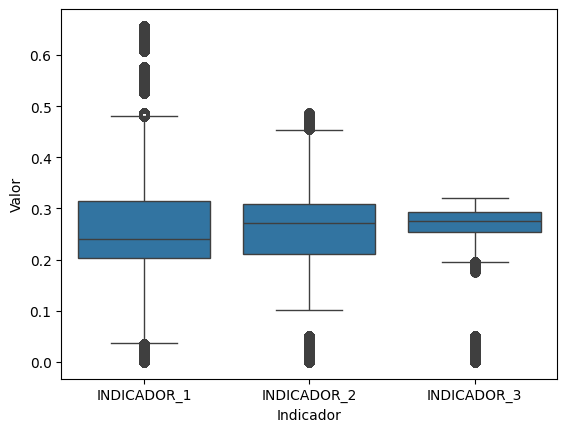

In [52]:
# Veamos con un box_plot el si hay outliers para los variables numericas continuas
df_melt = new_df[['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3']].melt(var_name='Indicador', value_name='Valor')

# Graficar
sns.boxplot(x='Indicador', y='Valor', data=df_melt)
plt.show()


Dentro del feature engineering debe considerarse el tratamiento de outliers, en nuestro caso tenemos tres variables numericas continuas que son INDICADOR_1, INDICADOR_2 e INDICADOR_3

Sin embargo no se tiene informaciín puntual de como se obtuvieron esos datos, luego para este caso los outliers no se eliminaran. Eventualmente veremos si se hace necesario volver a este punto para hacerles un tratamiento